In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn import datasets

ValueError: x and y must have same first dimension, but have shapes (1200,) and (1,)

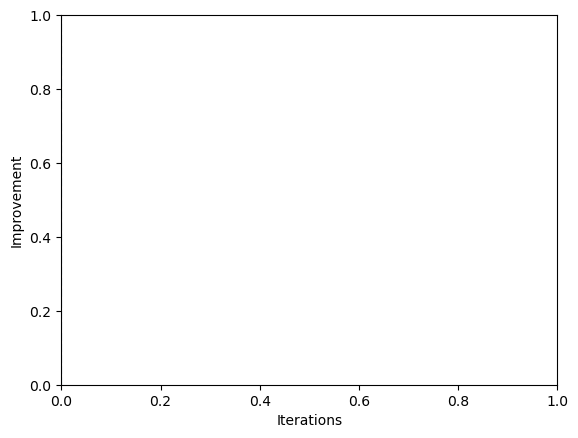

In [5]:
def gbt(params, X, y, ls):
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)
    cumsum = np.sum(clf.oob_improvement_)
    n = np.arange(params['n_estimators'])
    oob_best_iter = n[np.argmax(cumsum)]
    plt.xlabel('Iterations')
    plt.ylabel('Improvement')
    plt.axvline(x=oob_best_iter,linestyle=ls)
    plt.plot(n, cumsum, linestyle=ls)
    
X, y = datasets.make_blobs(n_samples=50, centers=5, random_state=0, cluster_std=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=9)

p1 = {'n_estimators':1200, 'max_depth':3, 'subsample':0.5, 'learning_rate':0.01, 'min_samples_leaf':1,'random_state':3}
p2 = {'n_estimators': 1200, 'max_depth': 3, 'subsample': 0.5, 'learning_rate': 0.001, 'min_samples_leaf': 1, 'random_state':3}

gbt(p1, X,y, ls='--')
gbt(p2, X,y, ls='-')
    